# 목차

<font color = "blue"><p>
- [데이터 정보 확인](#데이터-정보-확인)
- [결측치 처리](#결측치-처리)
- [범주형 변수 처리](#범주형-변수-처리)
- [이상치 처리](#이상치-처리)
- [Scaling](#Scaling)
- [Transform](#Transform)
- [Feature Selection](#Feature-Selection)
- [PCA](#PCA)
- [Hyperparameter Tuning](#Hyperparameter-Tuning)

# 라이브러리 및 데이터 로드 

In [1]:
! pip install klib

     |████████████████████████████████| 133 kB 2.6 MB/s eta 0:00:01
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import klib

#ignore warningss
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 원본데이터가 상하지 않게 copy해서 불러오는 습관 들이기
train_df = pd.read_csv('./data/train.csv').copy()
test_df = pd.read_csv('./data/test.csv').copy()

# 데이터 정보 확인

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    916 non-null    float64
 1   Sex       916 non-null    object 
 2   Age       741 non-null    float64
 3   Sibsp     916 non-null    float64
 4   Parch     916 non-null    float64
 5   Ticket    916 non-null    object 
 6   Fare      916 non-null    float64
 7   Cabin     214 non-null    object 
 8   Embarked  914 non-null    object 
 9   survived  916 non-null    int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 71.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    393 non-null    float64
 1   Sex       393 non-null    object 
 2   Age       305 non-null    float64
 3   Sibsp     393 non-null    float64
 4   Parch     393 non-null    float64
 5   Ticket    393 non-null    object 
 6   Fare      392 non-null    float64
 7   Cabin     81 non-null     object 
 8   Embarked  393 non-null    object 
dtypes: float64(5), object(4)
memory usage: 27.8+ KB


In [5]:
train_df.head()

,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,2.0,female,13.0,0.0,1.0,250644,19.5000,NaN,S,1
1,2.0,female,4.0,1.0,1.0,29103,23.0000,NaN,S,1
2,2.0,female,30.0,1.0,0.0,SC/PARIS 2148,13.8583,NaN,C,1
3,3.0,male,NaN,0.0,0.0,36209,7.7250,NaN,Q,0
4,3.0,female,22.0,0.0,0.0,334914,7.7250,NaN,Q,1


In [6]:
# survived column은 y값이기 때문에 없음

test_df.head()

,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,3.0,male,38.0,0.0,0.0,349249,7.8958,NaN,S
1,2.0,female,21.0,0.0,1.0,S.O./P.P. 2,21.0000,NaN,S
2,2.0,male,42.0,1.0,0.0,243847,27.0000,NaN,S
3,3.0,male,NaN,0.0,0.0,364498,14.5000,NaN,S
4,2.0,male,25.0,0.0,0.0,C.A. 31029,31.5000,NaN,S


# 결측치 확인 

In [7]:
print('train data 결측치 비율 \n')

for col in train_df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * train_df[col].isnull().sum() / train_df[col].shape[0])
    print(msg)

train data 결측치 비율 

column:     Pclass	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.10%
column:      Sibsp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 76.64%
column:   Embarked	 Percent of NaN value: 0.22%
column:   survived	 Percent of NaN value: 0.00%


In [8]:
print('test data 결측치 비율 \n')
for col in test_df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * test_df[col].isnull().sum() / test_df[col].shape[0])
    print(msg)

test data 결측치 비율 

column:     Pclass	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 22.39%
column:      Sibsp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.25%
column:      Cabin	 Percent of NaN value: 79.39%
column:   Embarked	 Percent of NaN value: 0.00%


### 시각화를 통한 결측치 확인

<font color = blue> klib 패키지 활용

GridSpec(6, 6)

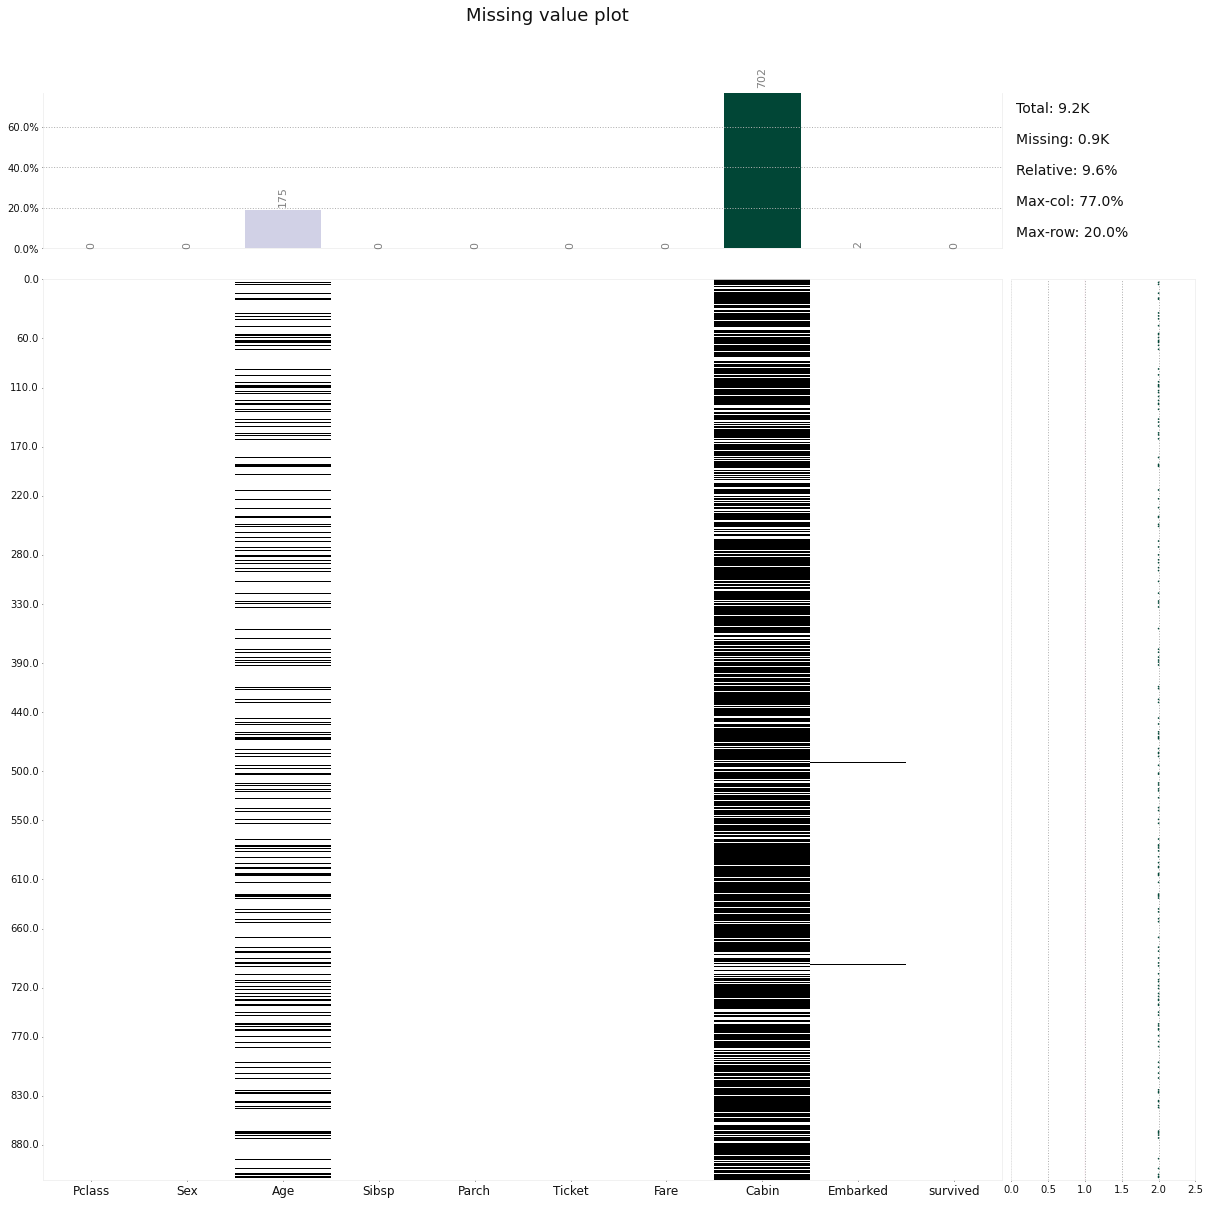

In [9]:
klib.missingval_plot(train_df)

GridSpec(6, 6)

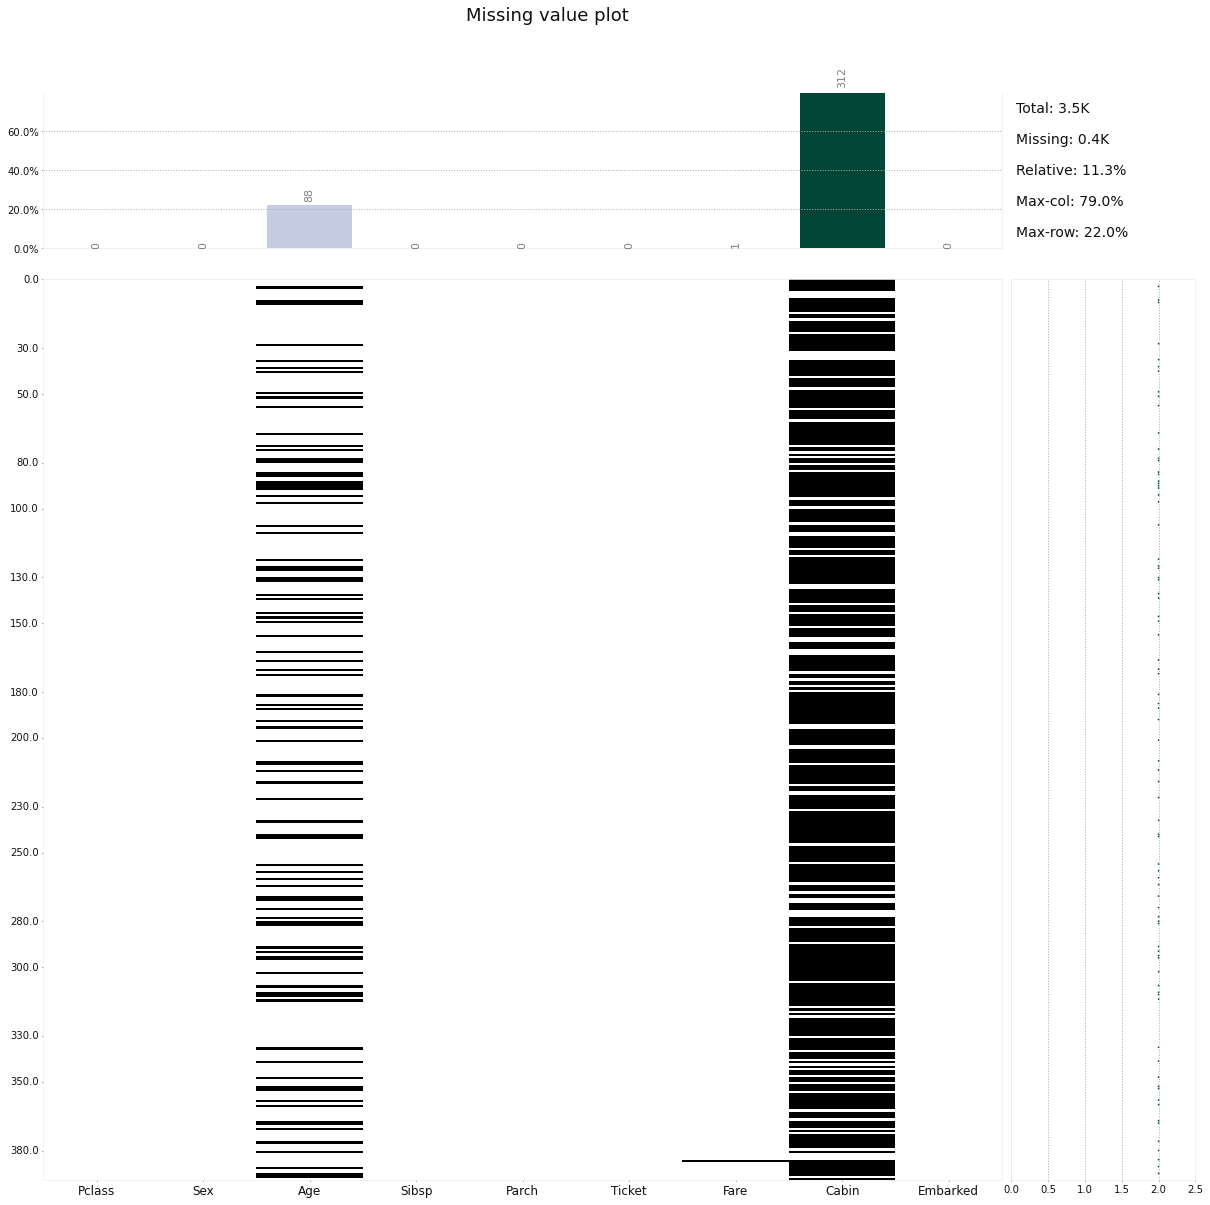

In [10]:
klib.missingval_plot(test_df)

# 결측치 처리

모든 결측치 처리 방법은 train data를 기준으로 한 뒤 test data에는 적용하는 방식으로 진행되어야함

age, cabin, embarked 3개의 Feature에 대해 각각 다른 결측치 처리 방법을 적용

### [Cabin]

In [11]:
train_df.shape, test_df.shape

((916, 10), (393, 9))

In [12]:
train_df.drop('Cabin', axis = 1, inplace=True)
test_df.drop('Cabin', axis = 1, inplace=True)

In [13]:
train_df.shape, test_df.shape

((916, 9), (393, 8))

### [Age]

데이터의 속성에 따라 결측치를 처리하는 방법도 달라져야함    
Numeric? Categoric?

In [14]:
train_df.loc[:, ['Age', 'Embarked']].dtypes

Age         float64
Embarked     object
dtype: object

#### 단순대체

In [15]:
train_df.Age.mean()

30.23144399460189

In [16]:
train_df.Age.median()

28.0

In [17]:
train_df.Age.value_counts()

24.0000    32
21.0000    31
30.0000    30
22.0000    29
18.0000    27
           ..
45.5000     1
66.0000     1
0.8333      1
7.0000      1
0.1667      1
Name: Age, Length: 86, dtype: int64

In [18]:
train_df.Age.fillna(24).isna().sum()

# 아직 assign을 하지 않았기 때문에 원본 data에는 적용되지 않음

0

#### 다중대체

다중대체 시에는 문자 변수는 들어갈 수 없다.

In [19]:
# 다중대체 사용하기 전 전처리

data_imp = train_df.copy()
data_imp.drop(['survived','Ticket', 'Embarked'], axis = 1, inplace = True)
data_imp['Sex'] = data_imp.Sex.map(lambda x: 1 if x == 'male' else 0)
data_imp

,Pclass,Sex,Age,Sibsp,Parch,Fare
0,2.0,0,13.0000,0.0,1.0,19.5000
1,2.0,0,4.0000,1.0,1.0,23.0000
2,2.0,0,30.0000,1.0,0.0,13.8583
3,3.0,1,NaN,0.0,0.0,7.7250
4,3.0,0,22.0000,0.0,0.0,7.7250
...,...,...,...,...,...,...
911,3.0,0,0.1667,1.0,2.0,20.5750
912,3.0,1,NaN,0.0,0.0,8.0500
913,3.0,0,NaN,0.0,0.0,7.7333
914,2.0,0,20.0000,0.0,0.0,36.7500


In [20]:
# test set에도 같은 방법 적용
data_imp_te = test_df.copy()
data_imp_te.drop(['Ticket', 'Embarked'], axis = 1, inplace = True)
data_imp_te['Sex'] = data_imp_te.Sex.map(lambda x: 1 if x == 'male' else 0)
data_imp_te

,Pclass,Sex,Age,Sibsp,Parch,Fare
0,3.0,1,38.0,0.0,0.0,7.8958
1,2.0,0,21.0,0.0,1.0,21.0000
2,2.0,1,42.0,1.0,0.0,27.0000
3,3.0,1,NaN,0.0,0.0,14.5000
4,2.0,1,25.0,0.0,0.0,31.5000
...,...,...,...,...,...,...
388,3.0,1,33.0,0.0,0.0,7.8542
389,2.0,0,31.0,0.0,0.0,21.0000
390,3.0,1,NaN,0.0,0.0,7.7500
391,3.0,1,NaN,0.0,0.0,7.7500


In [21]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform')
value = imputer.fit_transform(data_imp)
data_imp = pd.DataFrame(columns = data_imp.columns, data = value)

In [22]:
# 결측치 였던 값들이 어떻게 변했나??
np.round(data_imp.loc[train_df[train_df['Age'].isna()].index]['Age'])

3      46.0
5      31.0
14     31.0
19     31.0
20     25.0
       ... 
904    26.0
909    24.0
910    26.0
912    31.0
913    29.0
Name: Age, Length: 175, dtype: float64

In [23]:
data_imp['Age'] = np.round(data_imp['Age'])

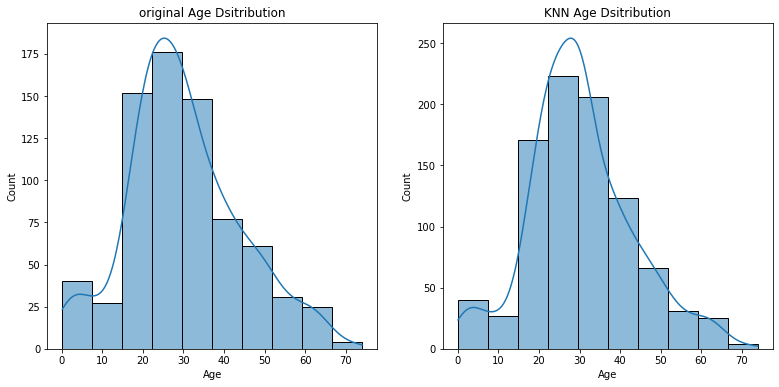

In [24]:
# 결측치 처리 전과 결측치 처리 후의 분포를 비교

fig, axes = plt.subplots(1,2, figsize = (13, 6))
sns.histplot(data = train_df, x = 'Age', ax = axes[0], bins=10, kde = True)
sns.histplot(data = data_imp, x = 'Age', ax = axes[1], bins=10, kde = True)

axes[0].set_title('original Age Dsitribution')
axes[1].set_title('KNN Age Dsitribution')
plt.show()

In [25]:
# 원본 데이터에서 결측치 처리
train_df['Age'] = data_imp['Age']

In [26]:
# 테스트 데이터에도 같은 결측치 처리

value_te = imputer.transform(data_imp_te) # test 데이터에는 transform만 수행!!
data_imp_te = pd.DataFrame(columns = data_imp_te.columns, data = value_te)
test_df['Age'] = np.round(data_imp_te['Age'])

### [Embarked]

In [27]:
from sklearn.impute import SimpleImputer
s_imputer = SimpleImputer(strategy='most_frequent')

train_df['Embarked'] = s_imputer.fit_transform(train_df[['Embarked']])
test_df['Embarked'] = s_imputer.transform(test_df[['Embarked']])

 <font color = red> 항상 train set과 test set에 같은 처리를 해주어야함!

### [Fare]

In [28]:
# Fare에 있는 결측값 제거
test_df.drop(test_df[test_df['Fare'].isna()].index, axis = 0, inplace = True)

#### 최종확인 

In [29]:
klib.missingval_plot(train_df)

No missing values found in the dataset.


In [30]:
klib.missingval_plot(test_df)

No missing values found in the dataset.


# 범주형 변수 처리

## Label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() #labelencoder함수를 가져온다.
encoder.fit(train_df.Embarked) #내가 가지고 있는 데이터에 학습시킨다
Embarked_label = encoder.transform(train_df.Embarked) # transform으로 변환한다

In [32]:
# 여러 열에 적용하고 싶은 경우, for문 이용

label = ['Sex', 'Embarked']

for i in label:
    encoder = LabelEncoder()
    encoder.fit(train_df[i])
    # train_df[i]= encoder.transform(train_df[i])
    # test_df[i]= encoder.transform(test_df[i])

## one-hot encoding

In [33]:
train_df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [34]:
# get dummies 함수로 one hot encoding

pd.get_dummies(train_df.Embarked, prefix = 'Embarked')

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
911,0,0,1
912,0,0,1
913,0,1,0
914,0,0,1


In [35]:
pd.concat([train_df.Embarked ,pd.get_dummies(train_df.Embarked, prefix = 'Embarked')], axis = 1)

,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,0,0,1
1,S,0,0,1
2,C,1,0,0
3,Q,0,1,0
4,Q,0,1,0
...,...,...,...,...
911,S,0,0,1
912,S,0,0,1
913,Q,0,1,0
914,S,0,0,1


## Target encoding

In [36]:
Embarked_target_mean = train_df.groupby('Embarked')['survived'].mean().to_dict() ; Embarked_target_mean

{'C': 0.553072625698324, 'Q': 0.37349397590361444, 'S': 0.3409785932721712}

In [37]:
train_df['Embarked'] = train_df['Embarked'].map(Embarked_target_mean)
test_df['Embarked'] = test_df['Embarked'].map(Embarked_target_mean) 
train_df['Embarked']

0      0.340979
1      0.340979
2      0.553073
3      0.373494
4      0.373494
         ...   
911    0.340979
912    0.340979
913    0.373494
914    0.340979
915    0.373494
Name: Embarked, Length: 916, dtype: float64

# 이상치 처리

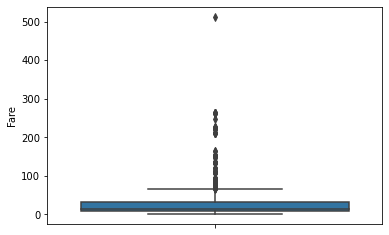

In [38]:
sns.boxplot(data = train_df , y = 'Fare')
plt.show()

In [39]:
def get_outlier(df=None,column=None,weight=1.5):
    
    column_x = df[column]
   
    # 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    quantile_25 = np.percentile(column_x.values,25)
    quantile_75 = np.percentile(column_x.values,75)
    
    
    # IQR을 구하고 IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 Dataframe index 반환
    outlier_index = column_x[(column_x < lowest_val) | (column_x > highest_val)].index
    return outlier_index

In [40]:
df_outlier = train_df.drop(get_outlier(df = train_df, column = 'Fare'), axis = 0)

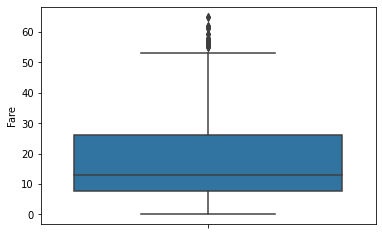

In [41]:
sns.boxplot(data = df_outlier, y = 'Fare')
plt.show()

#### 다른방법

In [42]:
# clip을 활용해 이상치(outlier)를 처리
# 낮은 0.05%와 높은 0.95% 데이터들을 대체한다.

train_df[['Fare']].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

,Fare
0,19.5000
1,23.0000
2,13.8583
3,7.7250
4,7.7250
...,...
911,20.5750
912,8.0500
913,7.7333
914,36.7500


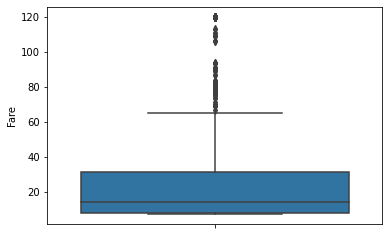

In [43]:
sns.boxplot(data = train_df[['Fare']].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0), y = 'Fare')
plt.show()

# Scaling

Scaling은 Numeric data에 대해서만 진행한다. (categoric은 불가능)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

In [45]:
train_num = train_df[['Age','Fare']]
test_num = test_df[['Age','Fare']]

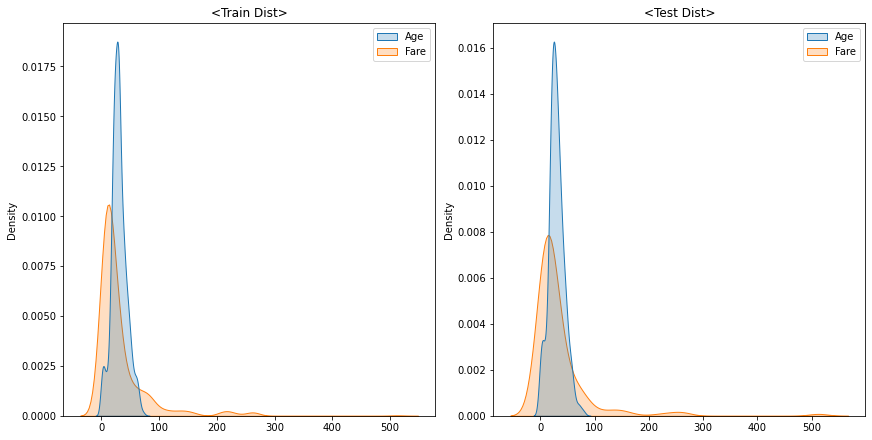

In [46]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)
sns.kdeplot(data = train_num[['Age','Fare']], shade = True, ax = axes[0])
axes[0].set_title('<Train Dist>')

sns.kdeplot(data = test_num[['Age','Fare']], shade = True, ax = axes[1])
axes[1].set_title('<Test Dist>')

plt.show()

In [47]:
scaler = StandardScaler()

train_num[['Age','Fare']] = scaler.fit_transform(train_num)
test_num[['Age','Fare']] = scaler.transform(test_num)

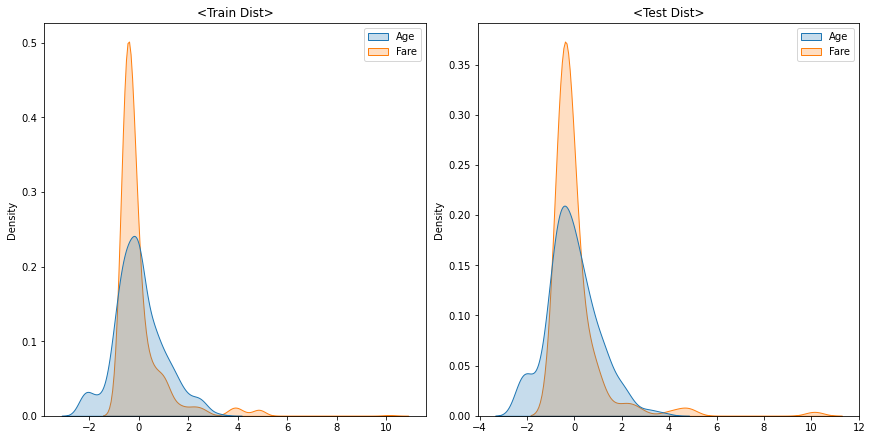

In [48]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)
sns.kdeplot(data = train_num[['Age','Fare']], shade = True, ax = axes[0])
axes[0].set_title('<Train Dist>')

sns.kdeplot(data = test_num[['Age','Fare']], shade = True, ax = axes[1])
axes[1].set_title('<Test Dist>')

plt.show()

# Transform

Fare data에 대해 log transform을 적용  

**log vs log1p**  
- 단순 np.log를 적용하면 0값을 포함한 데이터의 경우 -inf 라는 값을 가지게 된다.  
- 이를 방지하기 위해 log1p를 사용한다.

In [49]:
train_df['Fare_log'] = np.log1p(train_df['Fare'])
test_df['Fare_log'] = np.log1p(test_df['Fare'])

In [50]:
train_num = train_df[['Age','Fare', 'Fare_log']]
test_num = test_df[['Age','Fare', 'Fare_log']]

In [51]:
train_num.Fare_log.describe()

count    916.000000
mean       2.970333
std        0.972832
min        0.000000
25%        2.185579
50%        2.737881
75%        3.474293
max        6.240917
Name: Fare_log, dtype: float64

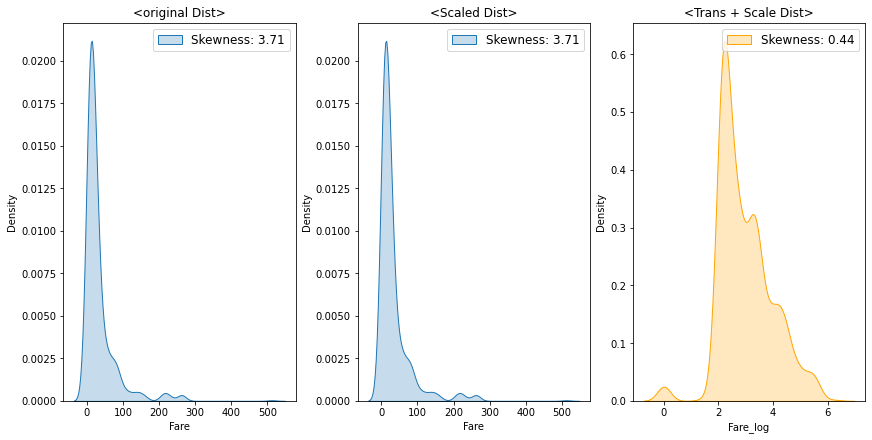

In [52]:
# 오리지널 data vs scaled data vs Trans + Scaled data 비교하기

fig, axes = plt.subplots(1, 3, figsize = (12, 6), constrained_layout=True)


sns.kdeplot(data = train_df['Fare'], shade = True, ax = axes[0], label = 'Skewness: {:.2f}'.format(train_df['Fare'].skew()))
axes[0].set_title('<original Dist>')
axes[0].legend(fontsize = 12)

sns.kdeplot(data = train_num['Fare'], shade = True, ax = axes[1], label = 'Skewness: {:.2f}'.format(train_num['Fare'].skew()))
axes[1].set_title('<Scaled Dist>')
axes[1].legend(fontsize = 12)

sns.kdeplot(data = train_num['Fare_log'], shade = True, ax = axes[2], label = 'Skewness: {:.2f}'.format(train_num['Fare_log'].skew()),
           color='orange')
axes[2].set_title('<Trans + Scale Dist>')
axes[2].legend(fontsize = 12)

plt.show()

# Feature Selection

### [보스턴 집값예측 Data ]

독립변수

- CRIM: 범죄율

- INDUS: 비소매상업지역 면적 비율

- NOX: 일산화질소 농도

- RM: 주택당 방 수

- LSTAT: 인구 중 하위 계층 비율

- B: 인구 중 흑인 비율

- PTRATIO: 학생/교사 비율

- ZN: 25,000 평방피트를 초과 거주지역 비율

- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0

- AGE: 1940년 이전에 건축된 주택의 비율

- RAD: 방사형 고속도로까지의 거리

- DIS: 직업센터의 거리

- TAX: 재산세율

종속변수

- MEDV : 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

#### <font color = red> 집값 예측이기 때문에 회귀문제

In [53]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_target = pd.DataFrame(boston.target, columns=["MEDV"])
boston_df = pd.concat([boston_df, boston_target], axis = 1)

In [54]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Filter method - 다중공선성(corr)을 활용한 Featrue Selection

- faeture 간의 correlation coeffiecient를 활용해 중요한 피쳐, 그렇지 않은 feature를 골라내자
- 상관계수의 범위는 -1 < x < 1 사이
- 상관계수 절대값이 크면 클 수록 높은 상관관계를 가지고 있으며 음수일 경우 음의 상관관계, 양수일 경우 양의 상관관계를 취함
- 상관계수가 |-0.1 ~ 0.1| 사이라면 거의 관계가 없다고 볼 수 있음

In [56]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


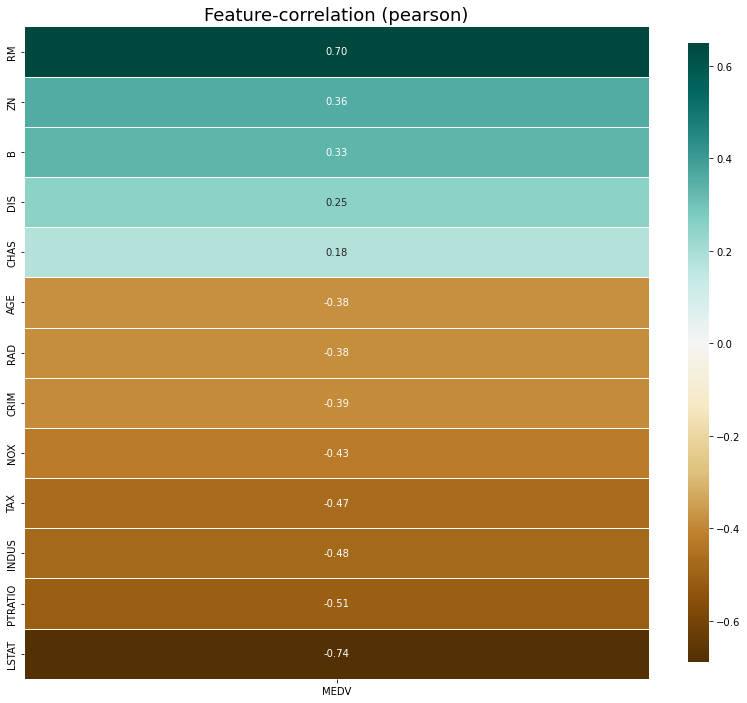

In [57]:
klib.corr_plot(data = boston_df.iloc[:, :-1], 
               target = boston_df.iloc[:, -1] ,
               figsize = (14, 12))

plt.show()

종속변수와 feature들과의 상관관계를 봤을 때 DIS, CHAS 변수는 y값인 MEDV와 큰 상관성이 없어 보인다.
  
<font color = blue> --> DIS, CHAS 변수는 종속변수와 상관성이 떨어지기 때문에 제거

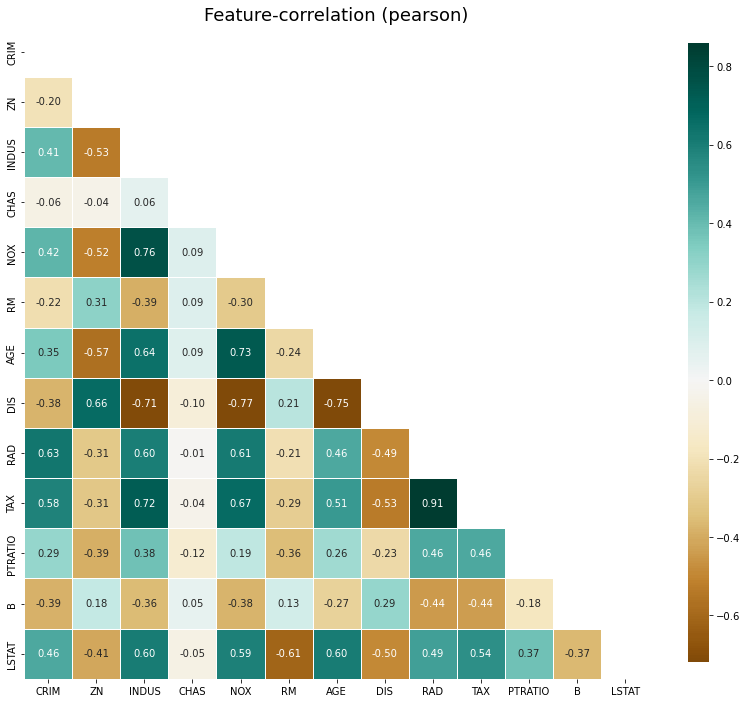

In [58]:
klib.corr_plot(data = boston_df.iloc[:, :-1] ,figsize = (14, 12))
plt.show()

독립변수들 끼리의 상관성을 보았을 때 TAX Feature와 RAD Feature는 0.91로 상관성이 강하게 나타난다. 

<font color = blue> --> 두 독립변수의 상관관계가 성능을 저하시킬 수 있으므로 둘 중 한 Feature를 제거한다. (Rad제거)

#### 그 외 다양한 Feature Selection 

In [59]:
boston_df_2 = boston_df.iloc[:,:-1].copy()

In [60]:
# 모델을 기반으로 피쳐를 selection

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector2 = SelectFromModel(RandomForestRegressor(random_state=0), threshold=None)

boston_df_fs2 = selector2.fit(boston_df_2, boston_target).transform(boston_df_2)

In [61]:
print("boston_df_2.shape: {},  boston_df_fs2.shape: {}".format(boston_df_2.shape, boston_df_fs2.shape))

boston_df_2.shape: (506, 13),  boston_df_fs2.shape: (506, 2)


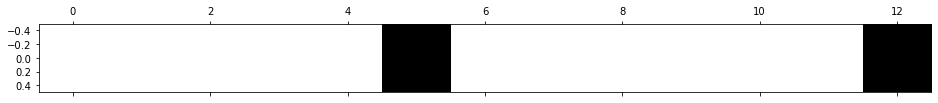

In [62]:
mask = selector2.get_support() # 중요도가 높다고 판단한 feature는 true로 반환
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.show()

# 검은색으로 표시된 부분이 랜덤 포레스트 모델이 중요하다고 여기는 것.

In [63]:
# tree model 기반의 feature importance

rf = RandomForestRegressor()
rf.fit(boston_df_2, boston_target)

RandomForestRegressor()

In [64]:
feature_import = pd.Series(rf.feature_importances_, boston_df_2.columns)

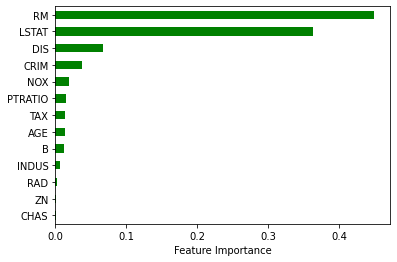

In [65]:
feature_import.sort_values(ascending = True).plot(kind = 'barh', color = 'green')
plt.xlabel('Feature Importance')
plt.show()

# PCA

In [66]:
boston_df_3 = boston_df.iloc[:,:-1].copy()

In [67]:
boston_df_3.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


각 컬럼마다 scale이 다르기 때문에 scale을 맞추어준 후 pca를 진행한다.

In [68]:
from sklearn.preprocessing import StandardScaler
boston_scale = StandardScaler().fit_transform(boston_df_3)

In [69]:
# fit_transfrom 후에는 보통 numpy array로 결과 도출
boston_scale

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [70]:
from sklearn.decomposition import PCA
boston_pca = PCA().fit(boston_scale) 

In [71]:
np.cumsum(boston_pca.explained_variance_ratio_)

array([0.47129606, 0.581548  , 0.67713389, 0.74310121, 0.80731782,
       0.8578876 , 0.89906884, 0.92953786, 0.9508412 , 0.96778257,
       0.98209137, 0.99511467, 1.        ])

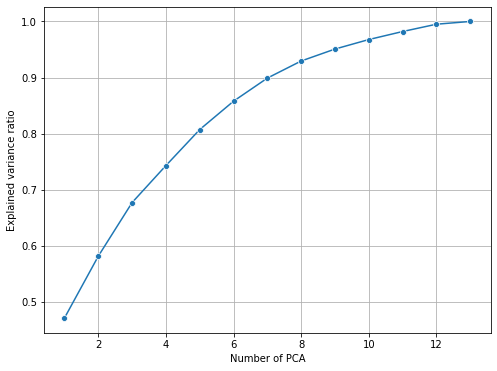

In [72]:
fig ,ax = plt.subplots(1,1, figsize = (8, 6))
sns.lineplot(np.arange(1,boston_scale.shape[1]+1),np.cumsum(boston_pca.explained_variance_ratio_), marker = 'o', ax=ax )
plt.grid()
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

- PC차원이 8개일 때 전체 data의 90% 정도를 설명할 수 있다.  
- 전체데이터의 어느정도를 설명할 지 결정하는 것은 분석가의 몫이다.

In [73]:
boston_pca = PCA(n_components= 8).fit_transform(boston_scale) 

In [74]:
pd.DataFrame(boston_pca)

,0,1,2,3,4,5,6,7
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524
...,...,...,...,...,...,...,...,...
501,-0.314968,0.724285,-0.860896,-0.434740,-1.121040,0.508064,0.199056,-0.249896
502,-0.110513,0.759308,-1.255979,-0.309376,-0.891542,0.408208,0.191779,-0.146502
503,-0.312360,1.155246,-0.408598,-0.786304,-1.595185,0.467947,0.294119,-0.638660
504,-0.270519,1.041362,-0.585454,-0.678134,-1.416024,0.482259,0.271597,-0.579344


#### 함수활용 pca 

In [75]:
def getPCA(df):
    max_col = df.shape[1]
    pca = PCA(n_components=max_col, random_state=0).fit(df)

    cumsum = np.cumsum(pca.explained_variance_ratio_) 
    num_col = np.argmax(cumsum >= 0.9) + 1

    pca = PCA(n_components = num_col, random_state=0).fit_transform(df)
    return pd.DataFrame(pca)   

In [76]:
getPCA(boston_scale)

,0,1,2,3,4,5,6,7
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524
...,...,...,...,...,...,...,...,...
501,-0.314968,0.724285,-0.860896,-0.434740,-1.121040,0.508064,0.199056,-0.249896
502,-0.110513,0.759308,-1.255979,-0.309376,-0.891542,0.408208,0.191779,-0.146502
503,-0.312360,1.155246,-0.408598,-0.786304,-1.595185,0.467947,0.294119,-0.638660
504,-0.270519,1.041362,-0.585454,-0.678134,-1.416024,0.482259,0.271597,-0.579344


#### <font color = red> PCA는 one-hot-Encoding 같이 실질적인 데이터는 적은데 차원은 많은 Sparse data 등을 줄이기 위한 방법으로도 사용된다!

# Hyperparameter Tuning

In [77]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_target = pd.DataFrame(wine.target, columns=["WINE"])
wine_df = pd.concat([wine_df, wine_target], axis = 1)

In [78]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WINE
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_df.iloc[:, :-1], wine_df.iloc[:, -1], test_size=0.2, random_state= 1004)

### 단일 모델

In [80]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train,y_train)

print(model_tree.score(X_test,y_test)) 

0.8888888888888888


### Grid Search

In [81]:
from sklearn.model_selection import GridSearchCV

model_dt = DecisionTreeClassifier(random_state = 42)

param_grid = {'criterion' :['gini','entropy'],  # 불순도 계산하는 척도
              'max_depth':[4,5,6,8,10],  # 깊이, 몇층까지 갈건지
              'min_samples_leaf':[3,5,10,50,100]}  # 한노드에 몇개의 샘플

# 2 * 5 * 5 = 50 번 반복
 
                 
gcv = GridSearchCV(model_dt,  # 모델
                   param_grid=param_grid, # 탐색할 파라미터들을 딕셔너리 형태로
                   cv=3, # 교차 검증 폴드 수
                   scoring='accuracy', # 성능 평가 지표
                   n_jobs=-1) # 컴퓨터의 모든 코어 사용

gcv.fit(X_train,y_train)

print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수
print(gcv.score(X_test,y_test))           # 튜닝 하기 전보다 높은 수치

final params {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3}
best score 0.9086879432624114
0.9444444444444444


### Random Search

In [82]:
from sklearn.model_selection import RandomizedSearchCV

model_dt = DecisionTreeClassifier(random_state = 42)

param_grid = {'criterion' :['gini','entropy'], 
              'max_depth':[4,5,6,8,10],  
              'min_samples_leaf':[3,5,10,50,100]}  

rcv = RandomizedSearchCV(model_dt, param_distributions=param_grid, scoring='accuracy', n_iter=8) # 8 번 반복
rcv.fit(X_train,y_train)

print('final params', rcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', rcv.best_score_)      # 최고의 점수
print(rcv.score(X_test,y_test))           # # 튜닝 하기 전보다 높은 수치

final params {'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'entropy'}
best score 0.9017241379310346
0.9166666666666666


In [83]:
print('기존모델 성능 : ', model_tree.score(X_test,y_test))
print('grid_search 이용해 튜닝한 모델 성능 : ', gcv.score(X_test, y_test))
print('random_search 이용해 튜닝한 모델 성능 : ', rcv.score(X_test, y_test))

기존모델 성능 :  0.8888888888888888
grid_search 이용해 튜닝한 모델 성능 :  0.9444444444444444
random_search 이용해 튜닝한 모델 성능 :  0.9166666666666666


# 베이지안 최적화

In [ ]:
!pip install bayesian-optimization

In [84]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import log_loss

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [85]:
# Step1. 탐색하고싶은 하이퍼파라미터의 범위를 dictionary 형태로 지정.
pbounds = {'n_estimators': (10,30),
            'max_depth': (5,10)}

# Step2. 1에서 생성한 dictionary의 key를 arguments로 하는 함수 생성
def rnd_opt(n_estimators, max_depth):

    # Step3. 탐색하고싶은 하이퍼파라미터의 조건 지정
    params = {
        'n_estimators' : int(round(n_estimators,0)),
        'max_depth' : int(round(max_depth,0))
    }
    
    # Step4. 모델 생성
    rnd_clf = RandomForestClassifier(**params)
    rnd_clf.fit(X_train, y_train)
    
    # Step5. 최대화하려는 score 선언
    score = accuracy_score(y_test, rnd_clf.predict(X_test))
    
    return score

In [86]:
# Step6. BayesianOptimization 객체 생성
BO_rnd = BayesianOptimization(f = rnd_opt, pbounds = pbounds, random_state=42) # 최대화하려는 함수 f, 탐색범위 pbounds

# Step7. 최대화
BO_rnd.maximize(init_points=5, n_iter=25) # 처음 탐색 횟수 init_points, 추가 탐색 횟수 n_iter

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  1.0      |  6.873    |  29.01    |
|  2        |  1.0      |  8.66     |  21.97    |
|  3        |  0.9722   |  5.78     |  13.12    |
|  4        |  1.0      |  5.29     |  27.32    |
|  5        |  1.0      |  8.006    |  24.16    |
|  6        |  1.0      |  10.0     |  30.0     |
|  7        |  1.0      |  10.0     |  24.78    |
|  8        |  1.0      |  5.223    |  29.98    |
|  9        |  1.0      |  5.0      |  22.51    |
|  10       |  1.0      |  5.0      |  24.6     |
|  11       |  0.9722   |  10.0     |  27.66    |
|  12       |  1.0      |  6.825    |  22.72    |
|  13       |  0.9444   |  6.441    |  19.87    |
|  14       |  1.0      |  10.0     |  22.95    |
|  15       |  1.0      |  10.0     |  10.0     |
|  16       |  1.0      |  10.0     |  12.74    |
|  17       |  1.0      |  10.0     |  15.5     |
|  18       |  0.9722   |  7.586    |  10.0     |


In [87]:
# 하이퍼파라미터의 결과값을 불러와 "max_params"라는 변수에 저장
max_params = BO_rnd.max['params']

max_params['n_estimators'] = int(max_params['n_estimators'])
max_params['max_depth'] = int(max_params['max_depth'])
print(max_params)

{'max_depth': 6, 'n_estimators': 29}


In [88]:
# Bayesian Optimization의 결과를 "BO_tuend_rnd"라는 변수에 저장
BO_tuend_rnd = RandomForestClassifier(**max_params)